In [1]:
# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
# read in data
df_og = pd.read_csv("heart_2020_cleaned.csv")
df_og.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
#counts for whether coin trades or not
df_og.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [8]:
str_cols = []

for col in df_og.columns:
    if (df_og[col].dtype == object) & (col != "HeartDisease"):
        print(col)
        str_cols.append(col)
        
df_str = df_og.loc[:, str_cols]
df_str.head()

Smoking
AlcoholDrinking
Stroke
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [9]:
num_cols = []

for col in df_og.columns:
    if (df_og[col].dtype != object) & (col != "HeartDisease"):
        print(col)
        num_cols.append(col)
        
df_num = df_og.loc[:, num_cols]
df_num.head()

BMI
PhysicalHealth
MentalHealth
SleepTime


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [11]:
df_og2 = df_og.copy()

df_str_2 = df_og2.loc[:, str_cols]

col1 = df_str_2[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

le = LabelEncoder()
for i in col1:
  df_str_2[i] = le.fit_transform(df_str_2[i])

df2 = df_str_2[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

df_dum_2 = pd.get_dummies(df_str_2.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])

df_string_2=pd.concat([df2, df_dum_2], axis=1)

num_cols2 = []

for col in df_og2.columns:
    if (df_og2[col].dtype != object) & (col != "HeartDisease"):
        print(col)
        num_cols2.append(col)
        
df_num2 = df_og2.loc[:, num_cols2]

df_num2.drop('SleepTime', axis=1, inplace=True)

num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth']
Scaler = StandardScaler()

df_num[num_cols] = Scaler.fit_transform(df_num[num_cols])
df_num2[num_cols] = Scaler.fit_transform(df_num2[num_cols])
df_all = pd.concat([df_num2, df_string_2], axis=1)
df_all["HeartDisease"] = [1 if x == "Yes" else 0 for x in df_og2.HeartDisease]
df_all.head()

BMI
PhysicalHealth
MentalHealth
SleepTime


,BMI,PhysicalHealth,MentalHealth,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
0,-1.844750,-0.046751,3.281069,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,-1.256338,-0.424070,-0.490039,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,-0.274603,2.091388,3.281069,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
3,-0.647473,-0.424070,-0.490039,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,-0.726138,3.097572,-0.490039,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [101]:
# get features and target
X = df_all.drop(["HeartDisease", "AgeCategory_55-59", "Race_Other","Diabetic_Yes (during pregnancy)", "GenHealth_Good"], axis=1).values
y = df_all["HeartDisease"].values

In [102]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7499992182491909
0.2500007817508091


In [77]:
len(X_train)

239846

In [72]:
239846/27373

8.762137873086619

In [82]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 219418, 1: 219418})

In [83]:
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)

# Counter(y_resampled)

Counter({0: 292422, 1: 292422})

In [84]:
print(len(X_resampled))
print(len(X_train))


584844
239846


In [87]:
def evaluateModel(model, X_resampled, y_resampled, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_resampled, y_resampled)

    # EVALUATE the MODEL
    train_preds = model.predict(X_resampled)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_resampled, train_preds)
    conf_matrix_train = confusion_matrix(y_resampled, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

TRAINING SET
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    292422
           1       0.76      0.78      0.77    292422

    accuracy                           0.76    584844
   macro avg       0.76      0.76      0.76    584844
weighted avg       0.76      0.76      0.76    584844

[[218362  74060]
 [ 64050 228372]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     73004
           1       0.23      0.78      0.35      6945

    accuracy                           0.75     79949
   macro avg       0.60      0.76      0.60     79949
weighted avg       0.91      0.75      0.80     79949

[[54402 18602]
 [ 1543  5402]]


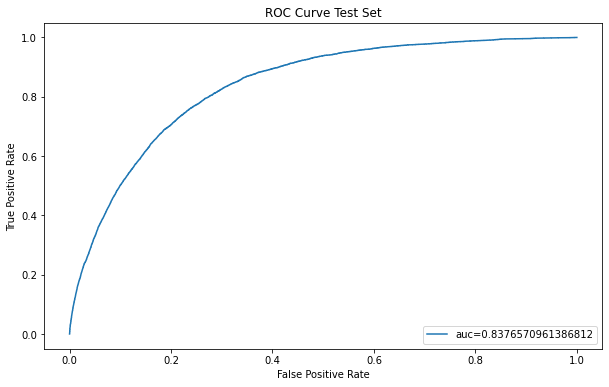

In [88]:
# Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_resampled, y_resampled, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.81      0.75      0.78    292422
           1       0.77      0.83      0.80    292422

    accuracy                           0.79    584844
   macro avg       0.79      0.79      0.79    584844
weighted avg       0.79      0.79      0.79    584844

[[218855  73567]
 [ 49695 242727]]

Testing SET
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     73004
           1       0.24      0.82      0.37      6945

    accuracy                           0.75     79949
   macro avg       0.61      0.79      0.61     79949
weighted avg       0.91      0.75      0.80     79949

[[54471 18533]
 [ 1219  5726]]


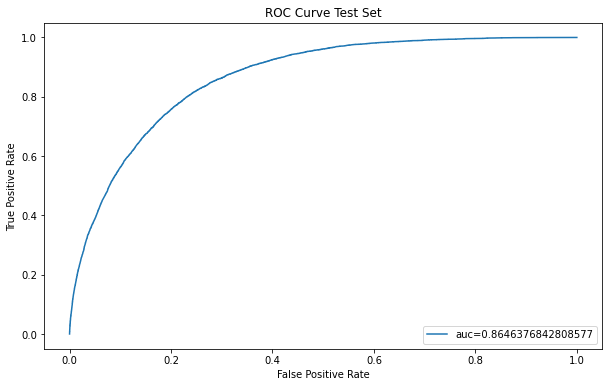

In [92]:
lr = XGBClassifier()
lr = evaluateModel(lr, X_resampled, y_resampled, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.80      0.72      0.76    292422
           1       0.75      0.82      0.78    292422

    accuracy                           0.77    584844
   macro avg       0.77      0.77      0.77    584844
weighted avg       0.77      0.77      0.77    584844

[[211112  81310]
 [ 51947 240475]]

Testing SET
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     73004
           1       0.22      0.82      0.34      6945

    accuracy                           0.73     79949
   macro avg       0.60      0.77      0.59     79949
weighted avg       0.91      0.73      0.79     79949

[[52584 20420]
 [ 1255  5690]]


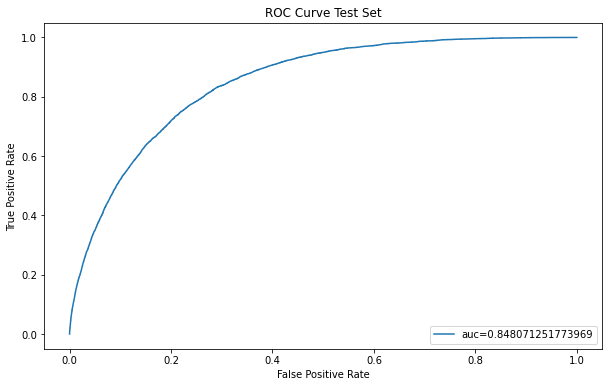

In [93]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_resampled, y_resampled, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    292422
           1       0.76      0.78      0.77    292422

    accuracy                           0.76    584844
   macro avg       0.76      0.76      0.76    584844
weighted avg       0.76      0.76      0.76    584844

[[219251  73171]
 [ 65280 227142]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     73004
           1       0.23      0.77      0.35      6945

    accuracy                           0.75     79949
   macro avg       0.60      0.76      0.60     79949
weighted avg       0.91      0.75      0.80     79949

[[54648 18356]
 [ 1564  5381]]


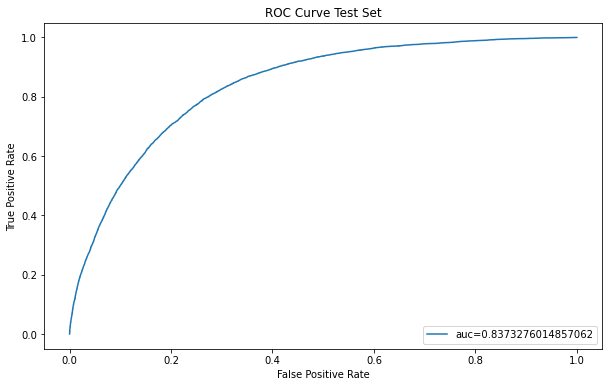

In [95]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_resampled, y_resampled, X_test, y_test)

In [127]:
randomForest = RandomForestClassifier(random_state=42)
randomForest = evaluateModel(randomForest, X_resampled, y_resampled, X_test, y_test)

TRAINING SET


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [ ]:
#first Machine Learning attempt determined that Random Forest 
#is our best model to determine if a patient has heart disease or not

In [103]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled_smote, y_resampled_smote = SMOTE(random_state=1).fit_resample(
    X_train, y_train
)
Counter(y_resampled_smote)

Counter({0: 219418, 1: 219418})

In [104]:
def evaluateModel(model, X_resampled_smote, y_resampled_smote, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_resampled_smote, y_resampled_smote)

    # EVALUATE the MODEL
    train_preds = model.predict(X_resampled_smote)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_resampled_smote, train_preds)
    conf_matrix_train = confusion_matrix(y_resampled_smote, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

C:\Users\yvargas\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET
              precision    recall  f1-score   support

           0       0.79      0.74      0.76    219418
           1       0.76      0.80      0.78    219418

    accuracy                           0.77    438836
   macro avg       0.77      0.77      0.77    438836
weighted avg       0.77      0.77      0.77    438836

[[162800  56618]
 [ 43714 175704]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     73004
           1       0.22      0.78      0.35      6945

    accuracy                           0.74     79949
   macro avg       0.60      0.76      0.59     79949
weighted avg       0.91      0.74      0.80     79949

[[54031 18973]
 [ 1521  5424]]


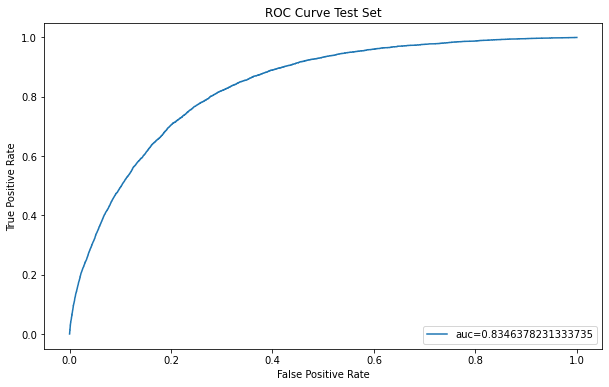

In [105]:
# Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_resampled_smote, y_resampled_smote, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    219418
           1       0.93      0.89      0.91    219418

    accuracy                           0.91    438836
   macro avg       0.91      0.91      0.91    438836
weighted avg       0.91      0.91      0.91    438836

[[203660  15758]
 [ 24688 194730]]

Testing SET
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     73004
           1       0.29      0.32      0.31      6945

    accuracy                           0.87     79949
   macro avg       0.61      0.62      0.62     79949
weighted avg       0.88      0.87      0.88     79949

[[67500  5504]
 [ 4700  2245]]


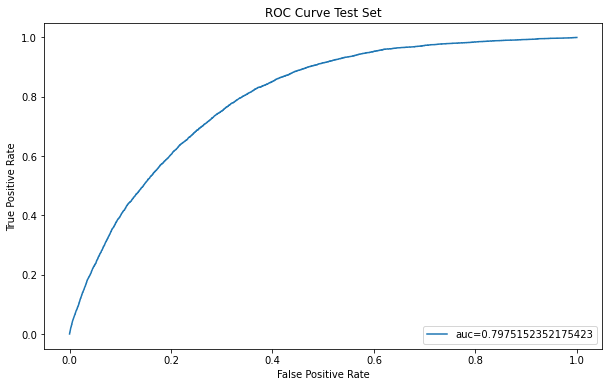

In [106]:
lr = XGBClassifier()
lr = evaluateModel(lr, X_resampled_smote, y_resampled_smote, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.88      0.91      0.90    219418
           1       0.91      0.88      0.89    219418

    accuracy                           0.89    438836
   macro avg       0.89      0.89      0.89    438836
weighted avg       0.89      0.89      0.89    438836

[[199171  20247]
 [ 26108 193310]]

Testing SET
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     73004
           1       0.29      0.40      0.33      6945

    accuracy                           0.86     79949
   macro avg       0.61      0.65      0.63     79949
weighted avg       0.88      0.86      0.87     79949

[[66231  6773]
 [ 4196  2749]]


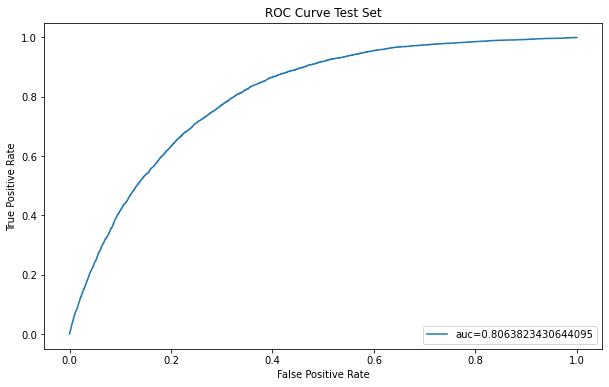

In [107]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_resampled_smote, y_resampled_smote, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219418
           1       1.00      1.00      1.00    219418

    accuracy                           1.00    438836
   macro avg       1.00      1.00      1.00    438836
weighted avg       1.00      1.00      1.00    438836

[[218672    746]
 [  1002 218416]]

Testing SET
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     73004
           1       0.25      0.26      0.25      6945

    accuracy                           0.87     79949
   macro avg       0.59      0.59      0.59     79949
weighted avg       0.87      0.87      0.87     79949

[[67462  5542]
 [ 5137  1808]]


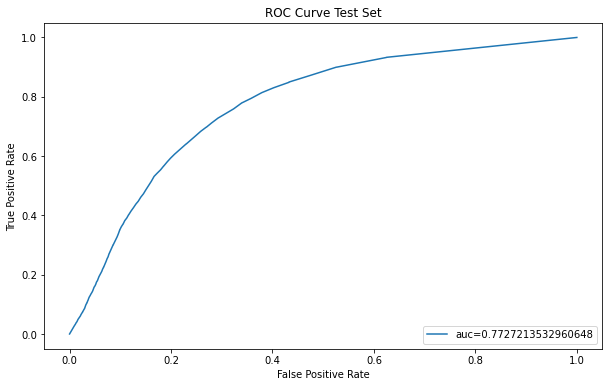

In [113]:
randomForestsmote = RandomForestClassifier(random_state=42)
randomForestsmote = evaluateModel(randomForestsmote, X_resampled_smote, y_resampled_smote, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    292422
           1       0.84      1.00      0.91     27373

    accuracy                           0.98    319795
   macro avg       0.92      0.99      0.95    319795
weighted avg       0.99      0.98      0.98    319795

[[287195   5227]
 [    72  27301]]


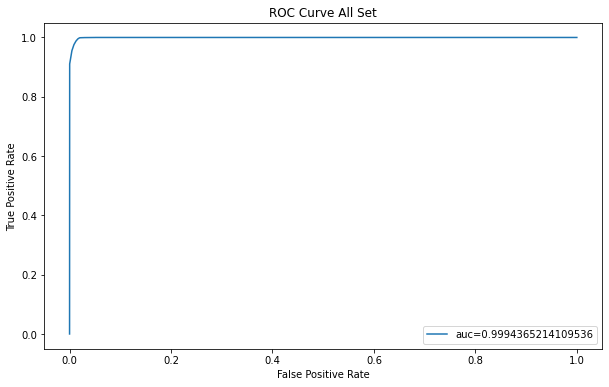

In [111]:
# get features and target
x_all = df_all.drop(["HeartDisease", "AgeCategory_55-59", "Race_Other","Diabetic_Yes (during pregnancy)", "GenHealth_Good"], axis=1).values
y_all = df_all["HeartDisease"].values

test_preds = randomForest.predict(x_all)
class_report_test = classification_report(y_all, test_preds)
conf_matrix_test = confusion_matrix(y_all, test_preds)

print(class_report_test)
print(conf_matrix_test)

y_pred_proba = randomForest.predict_proba(x_all)[::,1]
fpr, tpr, _ = roc_curve(y_all,  y_pred_proba)
auc = roc_auc_score(y_all, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve All Set")
plt.legend(loc=4)
plt.show()

In [115]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled_smoteen, y_resampled_smoteen = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled_smoteen)

Counter({0: 162208, 1: 179134})

In [119]:
len(X_resampled_smoteen)

341342

In [120]:
len(X_train)

239846

In [117]:
def evaluateModel(model, X_resampled_smoteen, y_resampled_smoteen, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_resampled_smoteen, y_resampled_smoteen)

    # EVALUATE the MODEL
    train_preds = model.predict(X_resampled_smoteen)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_resampled_smoteen, train_preds)
    conf_matrix_train = confusion_matrix(X_resampled_smoteen, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [122]:
model_smoteen = LogisticRegression(solver='lbfgs', random_state=42)
model_smoteen.fit(X_resampled_smoteen, y_resampled_smoteen)

LogisticRegression(random_state=42)

In [125]:
from sklearn.metrics import balanced_accuracy_score
y_pred_smoteen = model_smoteen.predict(X_test)
balanced_accuracy_score(y_test, y_pred_smoteen)

0.7631056735887407

In [126]:
confusion_matrix(y_test, y_pred_smoteen)

array([[52270, 20734],
       [ 1318,  5627]], dtype=int64)

In [121]:
lr = LogisticRegression()
lr = evaluateModel(lr, X_resampled_smoteen, y_resampled_smoteen, X_test, y_test)

TRAINING SET


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets